# Capstone Project - NLP Chatbot

### DOMAIN: 
Industrial safety. NLP based Chatbot.

### CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

### Columns description:
* Data: timestamp or time/date information
* Countries: which country the accident occurred (anonymised)
* Local: the city where the manufacturing plant is located (anonymised)
* Industry sector: which sector the plant belongs to
* Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
* Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have   been (due to other factors involved in the accident)
* Gender: if the person is male of female
* Employee or Third Party: if the injured person is an employee or a third party
* Critical Risk: some description of the risk involved in the accident
* Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

### PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Replace the folder path with your drive folder path and clone the githb repo

In [56]:
%cd /content/drive/MyDrive/AIML/Capstone

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-4950b27ae2f1>", line 1, in <module>
    get_ipython().magic('cd /content/drive/MyDrive/AIML/Capstone')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-84>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

During handling of 

FileNotFoundError: ignored

Run the below code for clone the repo in our Googele drive for first time

In [5]:
! git clone https://github.com/shyamsparrow/Jan-G4---NLP-Chatbot.git

Cloning into 'Jan-G4---NLP-Chatbot'...
remote: Enumerating objects: 534, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 534 (delta 35), reused 0 (delta 0), pack-reused 452
Receiving objects: 100% (534/534), 147.09 MiB | 16.34 MiB/s, done.
Resolving deltas: 100% (268/268), done.
Checking out files: 100% (22/22), done.


Change the Current folder into Github repo main folder, all the functions we are calling has to be in this repo.

In [ ]:
%cd /content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot

In [5]:
!git config --global user.email "pradeebha.ab@gmail.com"
!git config --global user.name "Pradeebha"

In [6]:
!git status

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [7]:
!git commit -m "My message"

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


Run this code to update the changes in repo to our drive

In [8]:
!git pull

Already up to date.


In [8]:
import warnings
warnings.filterwarnings('ignore')


import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pickle



In [9]:
industry_df = pd.read_csv("/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/industry_df_preprocessed.csv")

Model Building: Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(industry_df['Description_preprocessed'], industry_df['Potential_Accident_Level'].values, test_size=0.2, random_state=42)

In [11]:
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 328
Validation utterances: 83


In [12]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    
    names = []
    scores = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one
        result = clf.score(X_test,y_test) 

        names.append(name)
        scores.append(result) # Appending the test scores to the list

        result_df =  pd.DataFrame({'model': names, 'accuracy': scores}) # Creating the dataframe using the model scores
      
    return result_df # Returns the dataframe

TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Initializing TfidfVectorizer object
tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

In [15]:
X_train_tf[1]

<1x2671 sparse matrix of type '<class 'numpy.float64'>'
	with 54 stored elements in Compressed Sparse Row format>

ML Classifiers

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [17]:
ml_models(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)

,model,accuracy
0,LogReg,0.373494
1,Naive Bayes,0.421687
2,KNN,0.361446
3,SVM,0.361446
4,Decision Tree,0.313253
5,RandomForest,0.373494
6,Bagging,0.337349
7,AdaBoost,0.349398
8,Gradient Boost,0.337349
9,XGBoost,0.313253


For TF-IDF vectorization, the accuracy is quite less. Though Logistic Regression performs better than the rest, The accuracy is not upto the mark. Next better accuracy comes with Naive Bayes clasifier

Using Bag of words

A bag-of-words is a representation of text that describes the occurrence of words within a document.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

ML Classifiers

In [20]:
ml_models(X_train_bow.toarray(), y_train, X_test_bow.toarray(), y_test)

,model,accuracy
0,LogReg,0.445783
1,Naive Bayes,0.409639
2,KNN,0.277108
3,SVM,0.385542
4,Decision Tree,0.349398
5,RandomForest,0.349398
6,Bagging,0.397590
7,AdaBoost,0.277108
8,Gradient Boost,0.349398
9,XGBoost,0.385542


The accuracy using BOW is more or less similar to those we got using TF-IDF

Hyperparameter Tuning:

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [23]:
def RF_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param = {'criterion':['gini','entropy'],'max_depth': np.arange(11, 19), # if the outcome is 18, re use (16, 22)
                  'n_estimators': [50, 100]} # min_samples_split=2,
    #randomForest model without gridSrearch
    rf = RandomForestClassifier() # without specifying any parameter
    #use gridsearch to val all values
    rf_gscv = GridSearchCV(estimator = rf, param_grid = param, cv=nfolds)
    #fit model to data
    rf_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = rf_gscv.score(X, y) # with grid search
    
    return rf_gscv.best_params_, rf_gscv, score_gscv  

In [24]:
best_params, rf_gscv, score_gscv = RF_grid_search(X_train_tf, y_train,4)
print(best_params)
acc_RF_gs = score_gscv

acc_val_RF_gs = rf_gscv.score(X_test_tf,y_test)
predictions_RF_gs = rf_gscv.predict(X_test_tf) 
f1_RF_gs = f1_score(y_test,predictions_RF_gs, average='micro')


{'criterion': 'entropy', 'max_depth': 18, 'n_estimators': 100}


In [25]:
print(f1_RF_gs)


0.3253012048192771


In [26]:
print(acc_RF_gs, acc_val_RF_gs) 


0.9725609756097561 0.3253012048192771


In [39]:
print(classification_report(y_test, predictions_RF_gs))

              precision    recall  f1-score   support

           I       1.00      0.50      0.67         4
          II       0.40      0.19      0.26        21
         III       0.15      0.09      0.11        22
          IV       0.33      0.70      0.45        27
           V       0.00      0.00      0.00         9

    accuracy                           0.33        83
   macro avg       0.38      0.30      0.30        83
weighted avg       0.30      0.33      0.27        83



Hyperparameter tuning for Bagging classifier

In [27]:
def Bag_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param = {'n_estimators': [50, 100, 200]} # min_samples_split=2,
    #randomForest model without gridSrearch
    bg = BaggingClassifier(bootstrap=True, oob_score=True, random_state=22) # without specifying any parameter
    #use gridsearch to val all values
    bg_gscv = GridSearchCV(estimator = bg, param_grid = param, cv=nfolds)
    #fit model to data
    bg_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = bg_gscv.score(X, y) # with grid search
    
    return bg_gscv.best_params_, bg_gscv, score_gscv 

In [28]:
best_params, bg_gscv, score_gscv = Bag_grid_search(X_train_tf, y_train,4)
print(best_params)
acc_BG_gs = score_gscv
acc_val_BG_gs = bg_gscv.score(X_test_tf,y_test)
predictions_BG_gs = bg_gscv.predict(X_test_tf) 
f1_BG_gs = f1_score(y_test,predictions_BG_gs, average='micro')

{'n_estimators': 100}


In [32]:
print(f1_BG_gs)


0.3373493975903614


In [29]:
print(acc_BG_gs, acc_val_BG_gs) 


1.0 0.3373493975903614


In [40]:
print(classification_report(y_test, predictions_BG_gs))

              precision    recall  f1-score   support

           I       1.00      0.50      0.67         4
          II       0.42      0.24      0.30        21
         III       0.21      0.18      0.20        22
          IV       0.34      0.63      0.44        27
           V       0.00      0.00      0.00         9

    accuracy                           0.34        83
   macro avg       0.39      0.31      0.32        83
weighted avg       0.32      0.34      0.30        83



Hyperparameter tuning for XGBoost

In [30]:
def XGBoost_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param = {'learning_rate' :[0.05, 0.1,0.2], 'n_estimators':[50,100,200,300], 'max_depth':[5]} # min_samples_split=2,
    #randomForest model without gridSrearch
    xg = XGBClassifier() # without specifying any parameter
    #use gridsearch to val all values
    xg_gscv = GridSearchCV(estimator = xg, param_grid = param, cv=nfolds)
    #fit model to data
    xg_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = xg_gscv.score(X, y) # with grid search
    
    return xg_gscv.best_params_, xg_gscv, score_gscv  


In [31]:
best_params, xg_gscv, score_gscv = XGBoost_grid_search(X_train_tf, y_train,4)
print(best_params)
acc_XG_gs = score_gscv
acc_val_XG_gs = xg_gscv.score(X_test_tf,y_test)
predictions_XG_gs = xg_gscv.predict(X_test_tf) 
f1_XG_gs = f1_score(y_test,predictions_XG_gs, average='micro')

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [32]:
print('acc_XG_gs_o-->',acc_XG_gs)
print('acc_val_XG_gs_o-->',acc_val_XG_gs)
print('f1_XG_gs_o-->',f1_XG_gs)

acc_XG_gs_o--> 0.9725609756097561
acc_val_XG_gs_o--> 0.2891566265060241
f1_XG_gs_o--> 0.2891566265060241


In [41]:
print(classification_report(y_test, predictions_XG_gs))

              precision    recall  f1-score   support

           I       1.00      0.50      0.67         4
          II       0.26      0.24      0.25        21
         III       0.12      0.09      0.10        22
          IV       0.33      0.56      0.42        27
           V       0.00      0.00      0.00         9

    accuracy                           0.29        83
   macro avg       0.34      0.28      0.29        83
weighted avg       0.25      0.29      0.26        83



# Hyperparameter tuning for Logistic Regression

In [33]:
def LR_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty': ['l2']}
    #param = {'learning_rate' :[0.05, 0.1,0.2], 'n_estimators':[50,100,200,300], 'max_depth':[5]} # min_samples_split=2,
    #randomForest model without gridSrearch
    lr = LogisticRegression() # without specifying any parameter
    #use gridsearch to val all values
    lr_gscv = GridSearchCV(estimator = lr, param_grid = param, cv=nfolds)
    #fit model to data
    lr_gscv.fit(X, y) # with grid search
    #find score
    score_gscv = lr_gscv.score(X, y) # with grid search
    
    return lr_gscv.best_params_, lr_gscv, score_gscv  

In [34]:
best_params, lr_gscv, score_gscv = LR_grid_search(X_train_tf, y_train,4)
print(best_params)
acc_LR_gs = score_gscv
acc_val_LR_gs = lr_gscv.score(X_test_tf,y_test)
predictions_LR_gs = lr_gscv.predict(X_test_tf) 
f1_LR_gs = f1_score(y_test,predictions_LR_gs, average='micro')

{'penalty': 'l2', 'solver': 'saga'}


In [35]:
print(f1_LR_gs)


0.37349397590361444


In [36]:
print(acc_LR_gs, acc_val_LR_gs) 

0.8932926829268293 0.37349397590361444


In [42]:
print(classification_report(y_test, predictions_LR_gs))

              precision    recall  f1-score   support

           I       1.00      0.50      0.67         4
          II       0.44      0.19      0.27        21
         III       0.42      0.23      0.29        22
          IV       0.33      0.74      0.46        27
           V       0.00      0.00      0.00         9

    accuracy                           0.37        83
   macro avg       0.44      0.33      0.34        83
weighted avg       0.38      0.37      0.33        83



Plotting the Graph:

In [47]:
d = {'Model': ['Logistic Regression','Random Forest', 'Bagging Classifier','XGBoost'], 
          'F1_score':[f1_LR_gs, f1_RF_gs, f1_BG_gs, f1_XG_gs],
          'Train Validation Accuracy':[acc_LR_gs, acc_RF_gs, acc_BG_gs, acc_XG_gs] }

#df_metrics = pd.DataFrame(d)

print(d)

{'Model': ['Logistic Regression', 'Random Forest', 'Bagging Classifier', 'XGBoost'], 'F1_score': [0.37349397590361444, 0.3253012048192771, 0.3373493975903614, 0.2891566265060241], 'Train Validation Accuracy': [0.8932926829268293, 0.9725609756097561, 1.0, 0.9725609756097561]}


In [48]:
df_metrics = pd.DataFrame(d)
df_metrics

,Model,F1_score,Train Validation Accuracy
0,Logistic Regression,0.373494,0.893293
1,Random Forest,0.325301,0.972561
2,Bagging Classifier,0.337349,1.000000
3,XGBoost,0.289157,0.972561


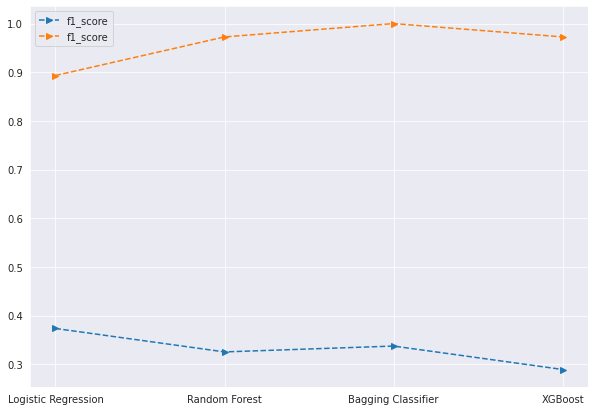

In [50]:
plt.figure(figsize = (10,7))
sns.set_style("darkgrid")
plt.plot(df_metrics['Model'], df_metrics['F1_score'],df_metrics['Train Validation Accuracy'], marker = '>', linestyle='--', label = 'f1_score')
plt.legend(fontsize = 10)
plt.show()


# Now using Augmented data

In [51]:
import pickle

In [52]:
infile = open('/content/drive/MyDrive/AIML/Capstone/X_aug_train.pickle','rb')
X_aug = pickle.load(infile)

FileNotFoundError: ignored